In [102]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rc('figure', figsize=(12, 10))
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB_ex1='#8dd3c7'
CB_ex2='#bebada'
CB_ex3='#ffffb3'
CB_ex4='#fb8072'
CB_ex5='#fdb462'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet,CB_ex1,CB_ex2,CB_ex3,CB_ex4,CB_ex5]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 22})

In [103]:
data_path = "C:/Users/345578/Documents/GitHub/Transfer_HPC/Secondtryfire.nc"

Fates_xr  = xr.open_dataset(data_path)  
### Set up labels 
test=Fates_xr.coords['time'].values
#print()
Fates_xr=Fates_xr.isel(time=slice(0,np.int(len(test)/2)))

#Fates_xr=Fates_xr.isel(time=slice(240,260))
### Set up labels 
Ages=Fates_xr.coords['fates_levage'].values
Time=Fates_xr.indexes['time'].to_datetimeindex()
FuelClass=Fates_xr.indexes['fates_levfuel'].values  
Canopy=Fates_xr.indexes['fates_levcan'].values  
nscls_bins = len(Fates_xr.variables['fates_levscls'])
npfts = len(Fates_xr.variables['fates_levpft'])
nage_bins = len(Fates_xr.variables['fates_levage'])
print(Time)

DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '1974-04-01', '1974-05-01', '1974-06-01', '1974-07-01',
               '1974-08-01', '1974-09-01', '1974-10-01', '1974-11-01',
               '1974-12-01', '1975-01-01'],
              dtype='datetime64[ns]', length=300, freq=None)


<ipython-input-103-e892ec7bffa9>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Fates_xr=Fates_xr.isel(time=slice(0,np.int(len(test)/2)))
<ipython-input-103-e892ec7bffa9>:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  Time=Fates_xr.indexes['time'].to_datetimeindex()


In [14]:

Ign_Dir='C:/Users/345578/Desktop/California_chaparral_project/Validation_Data/Ignitions/'
StudyArea=gpd.read_file(
    "C:/Users/345578/Desktop/California_chaparral_project/StudyArea_climate.shp"
   ).to_crs({'init': 'epsg:3857'})
#print(StudyArea.crs)
Area=StudyArea['geometry'].area.values
print("Study Area is "+str(Area/(10**6))+"km2")

Study Area is [54814.25139827]km2


### Ignitions per year. 

In [15]:
### Ignitions per year. 
Ign =gpd.read_file(Ign_Dir+"KS_subbed.gpkg")
nIgnbyYear=(Ign
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['OBJECTID'].count()
    )
nIgnbyYear=pd.DataFrame(nIgnbyYear).rename(columns={'OBJECTID':'peryear'})
nIgnbyYear["perm2"]=nIgnbyYear['peryear']/Area
nIgnbyYear["perkm2"]=nIgnbyYear["perm2"]*10**6
nIgnbyYear["IRI"]=1/nIgnbyYear["perkm2"]
print(nIgnbyYear)
print(nIgnbyYear["perkm2"].mean())

           peryear         perm2    perkm2         IRI
FIRE_YEAR                                             
1992           378  6.896017e-09  0.006896  145.011247
1993           416  7.589267e-09  0.007589  131.765027
1994           391  7.133181e-09  0.007133  140.189901
1995           460  8.391978e-09  0.008392  119.161416
1996           567  1.034403e-08  0.010344   96.674165
1997           341  6.221010e-09  0.006221  160.745605
1998           282  5.144647e-09  0.005145  194.376778
1999           289  5.272351e-09  0.005272  189.668690
2000           193  3.520982e-09  0.003521  284.011665
2001           229  4.177746e-09  0.004178  239.363543
2002           251  4.579101e-09  0.004579  218.383472
2003           238  4.341937e-09  0.004342  230.311981
2004           231  4.214233e-09  0.004214  237.291132
2005           356  6.494661e-09  0.006495  153.972616
2006           349  6.366957e-09  0.006367  157.060892
2007           275  5.016943e-09  0.005017  199.324551
2008      

Total Ignitions
* Mean ignition frequency :0.00527 km<sup>-1</sup> year<sup>-1</sup>
* IRI km<sup>-1</sup>  189 years

In [34]:
nIgnbyYear=(Ign
    .query('NWCG_CAUSE_CLASSIFICATION == "Natural"')
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['OBJECTID'].count()
    )
nIgnbyYear=pd.DataFrame(nIgnbyYear).rename(columns={'OBJECTID':'peryear'})
nIgnbyYear["perm2"]=nIgnbyYear['peryear']/Area
nIgnbyYear["perkm2"]=nIgnbyYear["perm2"]*10**6
nIgnbyYear["IRI"]=1/nIgnbyYear["perkm2"]
#print(nIgnbyYear)
print(nIgnbyYear["perkm2"].mean())
print(nIgnbyYear["IRI"].mean())

0.0002154128170409496
6791.599340286218


Lightning Ignitions

* Mean ignition frequency :0.000215 km<sup>-1</sup> year<sup>-1</sup>
* IRI km<sup>-1</sup>  6791 years

###  Fire days per year 

In [37]:
Ign['FireDays']=1+(Ign['CONT_DOY']-Ign['DISCOVERY_DOY'])
Ign['FireDays']=Ign['FireDays'].fillna(1)

Ign['FireDays'].values[Ign['FireDays'].values < 0] = Ign['FireDays'].values[Ign['FireDays'].values < 0]+360

nFiredaysperYear=(Ign
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['FireDays'].sum()
    )

nFiredaysperYear=pd.DataFrame(nFiredaysperYear).rename(columns={'FireDays':'peryear'})
nFiredaysperYear["perm2"]=nFiredaysperYear['peryear']/Area
nFiredaysperYear["perkm2"]=nFiredaysperYear["perm2"]*10**6
nFiredaysperYear["IRI"]=1/nFiredaysperYear["perkm2"]
#print(nFiredaysperYear)
print(nFiredaysperYear["perkm2"].mean())
print(nFiredaysperYear["IRI"].mean())

0.008239949559557713
135.51050193941043


Total fire days per year
* Mean fire day  frequency :0.0082 km-1 year-1
* IRI km-1 135.51 years


In [39]:
Ign['FireDays']=1+(Ign['CONT_DOY']-Ign['DISCOVERY_DOY'])
Ign['FireDays']=Ign['FireDays'].fillna(1)

Ign['FireDays'].values[Ign['FireDays'].values < 0] = Ign['FireDays'].values[Ign['FireDays'].values < 0]+360

nFiredaysperYear=(Ign
    .query('NWCG_CAUSE_CLASSIFICATION == "Natural"')              
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['FireDays'].sum()
    )

nFiredaysperYear=pd.DataFrame(nFiredaysperYear).rename(columns={'FireDays':'peryear'})
nFiredaysperYear["perm2"]=nFiredaysperYear['peryear']/Area
nFiredaysperYear["perkm2"]=nFiredaysperYear["perm2"]*10**6
nFiredaysperYear["IRI"]=1/nFiredaysperYear["perkm2"]
#print(nFiredaysperYear)
print(nFiredaysperYear["perkm2"].mean())
print(nFiredaysperYear["IRI"].mean())

0.0004813459038765193
3927.8124877608707


Lightning fire days per year
* Mean fire day  frequency :0.0004 km-1 year-1
* IRI km-1 3927.81 years

### FRP

In [112]:
Area_Burned_Year=(Ign
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['FIRE_SIZE'].sum()
    )
Area_Burned_Year=pd.DataFrame(Area_Burned_Year).rename(columns={'FIRE_SIZE':'Acperyear'})
Area_Burned_Year["haperyear"]=Area_Burned_Year['Acperyear']/2.54
Area_Burned_Year['FRP']=Area/(Area_Burned_Year["haperyear"]*10000)

meanFRP=(Area*27)/(sum(Area_Burned_Year["haperyear"])*10000)
Ign ['FIRE_SIZE'].sum()
print(meanFRP)
print(Area_Burned_Year['FRP'])

4556573.15

[82.69382744]
FIRE_YEAR
1992    512.164001
1993     69.982206
1994    180.705072
1995    139.026610
1996     95.366679
1997    150.658020
1998    257.769374
1999    104.631406
2000    454.950997
2001    428.683324
2002     60.288468
2003     18.789773
2004    134.318456
2005    215.923353
2006     39.743232
2007     17.663628
2008    161.954835
2009     63.207584
2010    496.471907
2011    584.288829
2012    360.406117
2013     99.495697
2014    423.996117
2015    196.201229
2016     88.843724
2017     34.480380
2018     79.821753
Name: FRP, dtype: float64


In [125]:
Light_Burned_Year=(Ign
    .query('NWCG_CAUSE_CLASSIFICATION == "Natural"')               
    .query('FIRE_SIZE >1')
    .groupby('FIRE_YEAR')
    ['FIRE_SIZE'].sum()
    )
Light_Burned_Year=pd.DataFrame(Light_Burned_Year).rename(columns={'FIRE_SIZE':'Acperyear'})
Light_Burned_Year["haperyear"]=Light_Burned_Year['Acperyear']/2.54
Light_Burned_Year['FRP']=Area/(Light_Burned_Year["haperyear"]*10000)
meanFRP=(Area*27)/(sum(Light_Burned_Year["haperyear"])*10000)

Estimated Fire Rotation period 1992-2018 is 82 years.
* The range in a given year is between 18 years (2003) and 590 (2011).

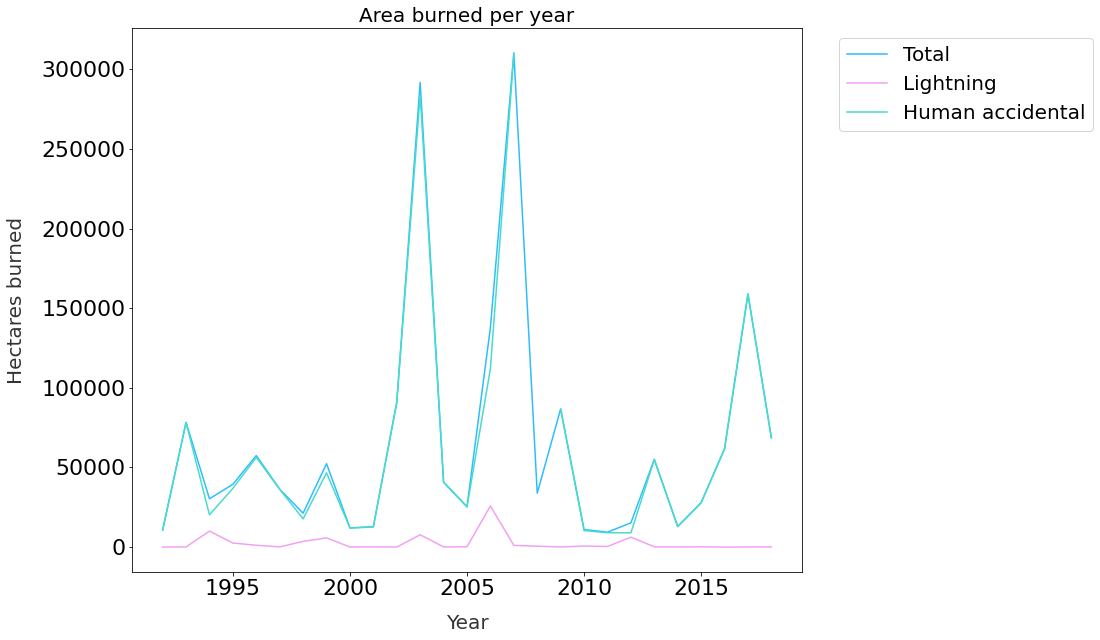

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams.update({'font.size': 22})
plt.title("Area burned per year", fontsize=20)
plt.plot(Area_Burned_Year["haperyear"],label="Total")
plt.plot(Light_Burned_Year["haperyear"],label="Lightning")
plt.plot(Area_Burned_Year["haperyear"]-Light_Burned_Year["haperyear"],label="Human accidental")
ax.set_xlabel("Year", labelpad=15, fontsize=20, color="#333533");
ax.set_ylabel("Hectares burned", labelpad=15, fontsize=20, color="#333533");
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 20})


In [ ]:
Fates unit area is km2 and the value is 40592444

In [117]:
Area_Burned_Year['FRP']

FIRE_YEAR
1992    512.164001
1993     69.982206
1994    180.705072
1995    139.026610
1996     95.366679
1997    150.658020
1998    257.769374
1999    104.631406
2000    454.950997
2001    428.683324
2002     60.288468
2003     18.789773
2004    134.318456
2005    215.923353
2006     39.743232
2007     17.663628
2008    161.954835
2009     63.207584
2010    496.471907
2011    584.288829
2012    360.406117
2013     99.495697
2014    423.996117
2015    196.201229
2016     88.843724
2017     34.480380
2018     79.821753
Name: FRP, dtype: float64

Text(0.5, 1.0, 'Fire rotation Period')

(0.0, 4000.0)

                       NI
1950-12-31  900998.250000
1951-12-31    3681.710449
1952-12-31     869.886719
1953-12-31     464.496185
1954-12-31     287.072449
1955-12-31     408.206604
1956-12-31     865.875977
1957-12-31    1416.004395
1958-12-31     869.935242
1959-12-31     649.031860
1960-12-31     694.589905
1961-12-31     710.199707
1962-12-31     491.312927
1963-12-31     495.747375
1964-12-31     306.143982
1965-12-31     459.427704
1966-12-31     773.661926
1967-12-31    1298.198486
1968-12-31     735.124084
1969-12-31     506.038910
1970-12-31     578.206482
1971-12-31     647.373413
1972-12-31     450.182190
1973-12-31     468.836578
1974-12-31     288.491974
1975-12-31  354717.468750


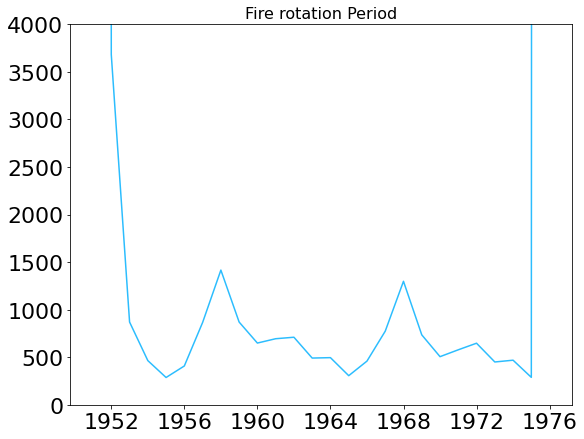

In [124]:
var=np.array(Fates_xr['FIRE_AREA'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).sum()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fire rotation Period", fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y= 82, color='r', linestyle='-')
plt.plot(1/var)
plt.ylim(0,4000)
print(1/var)

In [ ]:
var=np.array(Fates_xr['FIRE_AREA'])
var=pd.DataFrame({'NI':var.flatten()},index=Time).groupby(pd.Grouper(freq="y")).mean()
fig, ax = plt.subplots(figsize=(9, 7))
plt.title("Fraction burned annually", fontsize=16)
#plt.axhline(y=1.58, color='r', linestyle='-')
#plt.axhline(y=8.17, color='r', linestyle='-')
plt.plot(var)

Text(0.5, 1.0, 'Fire Size Distribution')

<BarContainer object of 9 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percent of total fires')

Text(0, 76.19535956928598, '76.1954')

Text(1, 12.690680681963851, '12.6907')

Text(2, 3.0637097807973337, '3.0637')

Text(3, 4.576336367132419, '4.5763')

Text(4, 1.2049737213177798, '1.205')

Text(5, 1.4100756313293168, '1.4101')

Text(6, 0.46147929752595823, '0.4615')

Text(7, 0.34610947314446866, '0.3461')

Text(8, 0.05127547750288425, '0.0513')

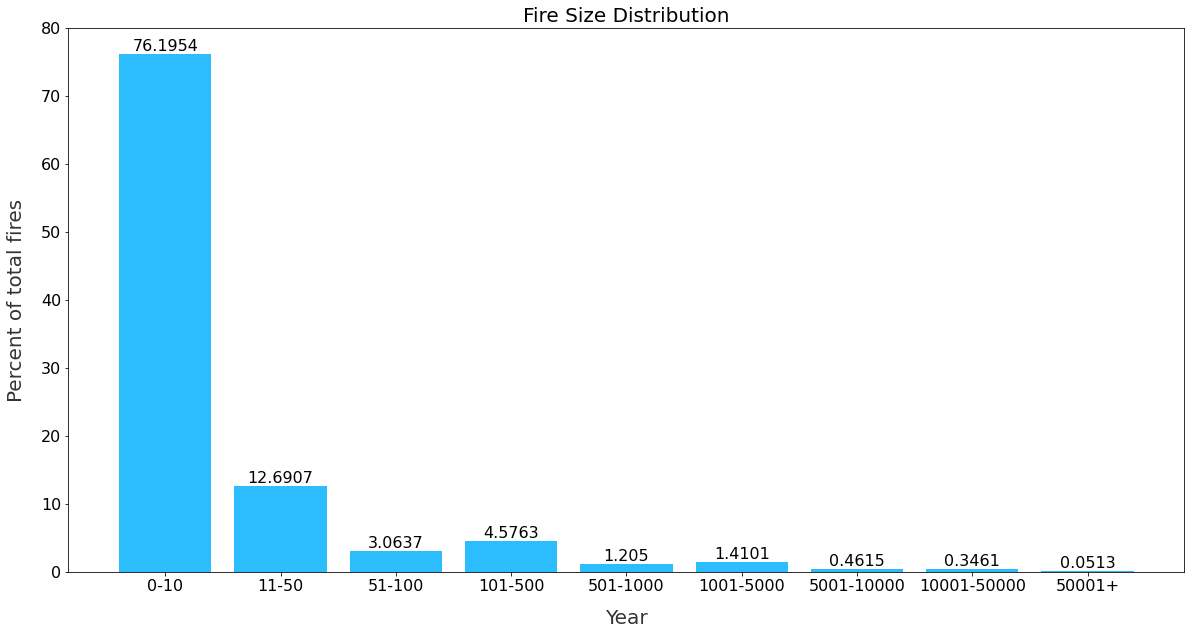

In [128]:
### Fire size distribution ###
Ign['FIRE_SIZE_ha']=Ign['FIRE_SIZE']/2.54
bins = [0, 10, 50,100,500,1000,5000, 10000,50000,100000]
labels = [1,2,3,4,5,6,7,8,9]
Ign['FireClass'] = pd.cut(Ign['FIRE_SIZE_ha'], bins=bins, labels=labels)
Fire_size_Class=pd.DataFrame(Ign
    .query('FIRE_SIZE >1')
    .groupby('FireClass')
    ['FireClass'].count()
    )
names=["0-10", "11-50", "51-100","101-500","501-1000","1001-5000","5001-10000", "10001-50000","50001+"]
Fire_size_Class['Percentage']=100*Fire_size_Class['FireClass']/sum(Fire_size_Class['FireClass'])
Fire_size_Class['LowerBound']=[0, 10, 50,100,500,1000,5000, 10000,50000]
#print(Fire_size_Class['Percentage'])
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Fire Size Distribution", fontsize=20)
plt.bar(names,Fire_size_Class['Percentage'], width=0.8)
ax.set_xlabel("Year", labelpad=15, fontsize=20, color="#333533");
ax.set_ylabel("Percent of total fires", labelpad=15, fontsize=20, color="#333533");
for i in range(len(Fire_size_Class['Percentage'])):
    plt.annotate(str(np.round(Fire_size_Class['Percentage'], 4)[i]), xy=(i,Fire_size_Class['Percentage'][i]), ha='center', va='bottom')
plt.show()

FireClass
1    76.1954
2    12.6907
3     3.0637
4     4.5763
5     1.2050
6     1.4101
7     0.4615
8     0.3461
9     0.0513
Name: Percentage, dtype: float64